In [77]:
import pandas as pd

# Dummy property dataset
data = {
    'Property_ID': [101, 102, 103, 104],
    'Address': ['123 Elm St', '456 Oak Ave', '789 Pine Ln', '101 Maple Rd'],
    'City': ['San Diego', 'Austin', 'Denver', 'Seattle'],
    'State': ['CA', 'TX', 'CO', 'WA'],
    'Zipcode': [92101, 73301, 80201, 98101],
    'Bedrooms': [3, 4, 2, 5],
    'Bathrooms': [2, 3, 1, 4],
    'Square_Feet': [1500, 2500, 1100, 3000],
    'Year_Built': [2001, 2010, 1995, 2020],
    'Price': [750000, 620000, 450000, 910000]  # Optional: to simulate predicted values
}

df = pd.DataFrame(data)
df.to_csv("dummy_real_estate_data.csv", index=False)
print(df)


   Property_ID       Address       City State  Zipcode  Bedrooms  Bathrooms  \
0          101    123 Elm St  San Diego    CA    92101         3          2   
1          102   456 Oak Ave     Austin    TX    73301         4          3   
2          103   789 Pine Ln     Denver    CO    80201         2          1   
3          104  101 Maple Rd    Seattle    WA    98101         5          4   

   Square_Feet  Year_Built   Price  
0         1500        2001  750000  
1         2500        2010  620000  
2         1100        1995  450000  
3         3000        2020  910000  


In [78]:
import requests
import pandas as pd

# Updated ZIP code (New York, NY)
params = {
    "postalcode": "10001",  # <-- You can change to any US ZIP
    "page": "1",
    "pagesize": "500"       # ATTOM limit per page is 500
}

headers = {
    "accept": "application/json",
    "apikey": "37555987cd1c90792bb742e6ea55e109"  # Replace if expired
}

url = "https://api.gateway.attomdata.com/propertyapi/v1.0.0/property/address"

try:
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        properties = data.get("property", [])
        if not isinstance(properties, list):
            properties = [properties]
        df = pd.json_normalize(properties, sep='_')

        print(f"\n✅ Data received: {len(df)} rows\n")
        print(df)  # Show full dataset

        # Optional: Save to CSV
        df.to_csv("attom_data_10001.csv", index=False)
        print("\n📁 Saved to attom_data_10001.csv")

    else:
        print(f"❌ Request failed with status code: {response.status_code}")
        print(response.text)

except Exception as e:
    print(f"🚨 An error occurred: {e}")



✅ Data received: 500 rows

     identifier_Id identifier_fips identifier_apn  identifier_attomId  \
0            30267           36061     00754-1004               30267   
1           398087           36061     00779-0045              398087   
2          1395391           36061     00804-0017             1395391   
3          1395418           36061     00753-0016             1395418   
4          1528817           36061     00802-0077             1528817   
..             ...             ...            ...                 ...   
495       37014797           36061   00732-00166H            37014797   
496       37014798           36061   00732-00168A            37014798   
497       37014799           36061   00732-00168H            37014799   
498       37014800           36061   00732-00168M            37014800   
499       37014801           36061   00732-00168P            37014801   

    address_country address_countrySubd         address_line1  \
0                US           

In [79]:
df

,identifier_Id,identifier_fips,identifier_apn,identifier_attomId,address_country,address_countrySubd,address_line1,address_line2,address_locality,address_matchCode,...,location_geoIdV4_DB,location_geoIdV4_N1,location_geoIdV4_N2,location_geoIdV4_PL,location_geoIdV4_SB,location_geoIdV4_ZI,vintage_lastModified,vintage_pubDate,location_geoIdV4_N4,location_geoIdV4_N3
0,30267,36061,00754-1004,30267,US,NY,357 W 30TH ST APT 4,"NEW YORK, NY 10001",NEW YORK,ExaStr,...,e35b0afc81cc59e43ff809102442a118,f9be93d2c511d894d208f7c02a07cad6,a4faa972f6740d3f5ac99821b8f6900f,219ca739bd6e73f7e89c24edb7eee9f7,"0da99c90906851a2939dd57c4f024d90, 5c9d8e069690...",68ba326151c3c611de1214ea0bf07a58,2025-06-24,2025-06-24,NaN,NaN
1,398087,36061,00779-0045,398087,US,NY,360 7TH AVE,"NEW YORK, NY 10001",NEW YORK,ExaStr,...,e35b0afc81cc59e43ff809102442a118,f9be93d2c511d894d208f7c02a07cad6,a4faa972f6740d3f5ac99821b8f6900f,219ca739bd6e73f7e89c24edb7eee9f7,"0da99c90906851a2939dd57c4f024d90, 5c9d8e069690...",68ba326151c3c611de1214ea0bf07a58,2025-06-24,2025-06-24,NaN,NaN
2,1395391,36061,00804-0017,1395391,US,NY,135 W 28TH ST,"NEW YORK, NY 10001",NEW YORK,ExaStr,...,e35b0afc81cc59e43ff809102442a118,f9be93d2c511d894d208f7c02a07cad6,a4faa972f6740d3f5ac99821b8f6900f,219ca739bd6e73f7e89c24edb7eee9f7,"0da99c90906851a2939dd57c4f024d90, 5c9d8e069690...",68ba326151c3c611de1214ea0bf07a58,2025-06-24,2025-06-24,65a250cbbc1deea61978fa1528cc59ff,NaN
3,1395418,36061,00753-0016,1395418,US,NY,339 W 29TH ST,"NEW YORK, NY 10001",NEW YORK,ExaStr,...,e35b0afc81cc59e43ff809102442a118,f9be93d2c511d894d208f7c02a07cad6,a4faa972f6740d3f5ac99821b8f6900f,219ca739bd6e73f7e89c24edb7eee9f7,"0da99c90906851a2939dd57c4f024d90, 5c9d8e069690...",68ba326151c3c611de1214ea0bf07a58,2025-06-24,2025-06-24,NaN,NaN
4,1528817,36061,00802-0077,1528817,US,NY,299 7TH AVE,"NEW YORK, NY 10001",NEW YORK,ExaStr,...,e35b0afc81cc59e43ff809102442a118,f9be93d2c511d894d208f7c02a07cad6,a4faa972f6740d3f5ac99821b8f6900f,219ca739bd6e73f7e89c24edb7eee9f7,"0da99c90906851a2939dd57c4f024d90, 5c9d8e069690...",68ba326151c3c611de1214ea0bf07a58,2025-06-24,2025-06-24,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,37014797,36061,00732-00166H,37014797,US,NY,433 W 34TH ST APT 6H,"NEW YORK, NY 10001",NEW YORK,ExaStr,...,e35b0afc81cc59e43ff809102442a118,f9be93d2c511d894d208f7c02a07cad6,0718a91dded1375dd3c5af89cc70528b,219ca739bd6e73f7e89c24edb7eee9f7,"3938b27aea5cd4466136b5f2866c4595, 5c9d8e069690...",68ba326151c3c611de1214ea0bf07a58,2025-06-24,2025-06-24,7ea0d5bb604deecded1224f9a5228335,NaN
496,37014798,36061,00732-00168A,37014798,US,NY,433 W 34TH ST APT 8A,"NEW YORK, NY 10001",NEW YORK,ExaStr,...,e35b0afc81cc59e43ff809102442a118,f9be93d2c511d894d208f7c02a07cad6,0718a91dded1375dd3c5af89cc70528b,219ca739bd6e73f7e89c24edb7eee9f7,"3938b27aea5cd4466136b5f2866c4595, 5c9d8e069690...",68ba326151c3c611de1214ea0bf07a58,2025-06-24,2025-06-24,7ea0d5bb604deecded1224f9a5228335,NaN
497,37014799,36061,00732-00168H,37014799,US,NY,433 W 34TH ST APT 8H,"NEW YORK, NY 10001",NEW YORK,ExaStr,...,e35b0afc81cc59e43ff809102442a118,f9be93d2c511d894d208f7c02a07cad6,0718a91dded1375dd3c5af89cc70528b,219ca739bd6e73f7e89c24edb7eee9f7,"3938b27aea5cd4466136b5f2866c4595, 5c9d8e069690...",68ba326151c3c611de1214ea0bf07a58,2025-06-24,2025-06-24,7ea0d5bb604deecded1224f9a5228335,NaN
498,37014800,36061,00732-00168M,37014800,US,NY,433 W 34TH ST APT 8M,"NEW YORK, NY 10001",NEW YORK,ExaStr,...,e35b0afc81cc59e43ff809102442a118,f9be93d2c511d894d208f7c02a07cad6,0718a91dded1375dd3c5af89cc70528b,219ca739bd6e73f7e89c24edb7eee9f7,"3938b27aea5cd4466136b5f2866c4595, 5c9d8e069690...",68ba326151c3c611de1214ea0bf07a58,2025-06-24,2025-06-24,7ea0d5bb604deecded1224f9a5228335,NaN


In [83]:
import pandas as pd

# Step 1: Load both datasets
dummy_df = pd.read_csv("dummy_real_estate_data.csv")
attom_df = pd.read_csv("attom_data_10001.csv")

In [84]:
# Step 2: Inspect ATTOM column names
print("\n📌 Columns in ATTOM data:\n", attom_df.columns.tolist())


📌 Columns in ATTOM data:
 ['identifier_Id', 'identifier_fips', 'identifier_apn', 'identifier_attomId', 'address_country', 'address_countrySubd', 'address_line1', 'address_line2', 'address_locality', 'address_matchCode', 'address_oneLine', 'address_postal1', 'address_postal2', 'address_postal3', 'location_accuracy', 'location_latitude', 'location_longitude', 'location_distance', 'location_geoid', 'location_geoIdV4_CO', 'location_geoIdV4_CS', 'location_geoIdV4_DB', 'location_geoIdV4_N1', 'location_geoIdV4_N2', 'location_geoIdV4_PL', 'location_geoIdV4_SB', 'location_geoIdV4_ZI', 'vintage_lastModified', 'vintage_pubDate', 'location_geoIdV4_N4', 'location_geoIdV4_N3']


In [85]:
# Step 3: Try to find a column with ZIP-like info
possible_zip_cols = [col for col in attom_df.columns if 'zip' in col.lower() or 'postal' in col.lower()]
print("\n🔍 Potential ZIP code columns:", possible_zip_cols)


🔍 Potential ZIP code columns: ['address_postal1', 'address_postal2', 'address_postal3']


In [86]:
# Step 4: Continue only if a ZIP code column exists
if possible_zip_cols:
    zip_col = possible_zip_cols[0]  # Choose the first match
    attom_df.rename(columns={zip_col: 'zipcode'}, inplace=True)
    
    # Clean both datasets
    dummy_df.columns = dummy_df.columns.str.lower().str.replace(' ', '_')
    attom_df.columns = attom_df.columns.str.lower().str.replace(' ', '_')
    
    dummy_df['zipcode'] = dummy_df['zipcode'].astype(str)
    attom_df['zipcode'] = attom_df['zipcode'].astype(str)

    # Merge datasets
    combined_df = pd.merge(dummy_df, attom_df, on='zipcode', how='outer')

    # Save and preview
    combined_df.to_csv("merged_cleaned_data.csv", index=False)
    print("\n✅ Merge completed. First 5 rows:\n")
    print(combined_df.head())

else:
    print("❌ No ZIP code column found in ATTOM data. Cannot merge.")


✅ Merge completed. First 5 rows:

   property_id address city state zipcode  bedrooms  bathrooms  square_feet  \
0          NaN     NaN  NaN   NaN   10001       NaN        NaN          NaN   
1          NaN     NaN  NaN   NaN   10001       NaN        NaN          NaN   
2          NaN     NaN  NaN   NaN   10001       NaN        NaN          NaN   
3          NaN     NaN  NaN   NaN   10001       NaN        NaN          NaN   
4          NaN     NaN  NaN   NaN   10001       NaN        NaN          NaN   

   year_built  price  ...               location_geoidv4_db  \
0         NaN    NaN  ...  e35b0afc81cc59e43ff809102442a118   
1         NaN    NaN  ...  e35b0afc81cc59e43ff809102442a118   
2         NaN    NaN  ...  e35b0afc81cc59e43ff809102442a118   
3         NaN    NaN  ...  e35b0afc81cc59e43ff809102442a118   
4         NaN    NaN  ...  e35b0afc81cc59e43ff809102442a118   

                location_geoidv4_n1               location_geoidv4_n2  \
0  f9be93d2c511d894d208f7c02a07cad6  a

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           4 non-null      float64
 1   address               4 non-null      object 
 2   city                  4 non-null      object 
 3   state                 4 non-null      object 
 4   zipcode               504 non-null    object 
 5   bedrooms              4 non-null      float64
 6   bathrooms             4 non-null      float64
 7   square_feet           4 non-null      float64
 8   year_built            4 non-null      float64
 9   price                 4 non-null      float64
 10  identifier_id         500 non-null    float64
 11  identifier_fips       500 non-null    float64
 12  identifier_apn        500 non-null    object 
 13  identifier_attomid    500 non-null    float64
 14  address_country       500 non-null    object 
 15  address_countrysubd   5

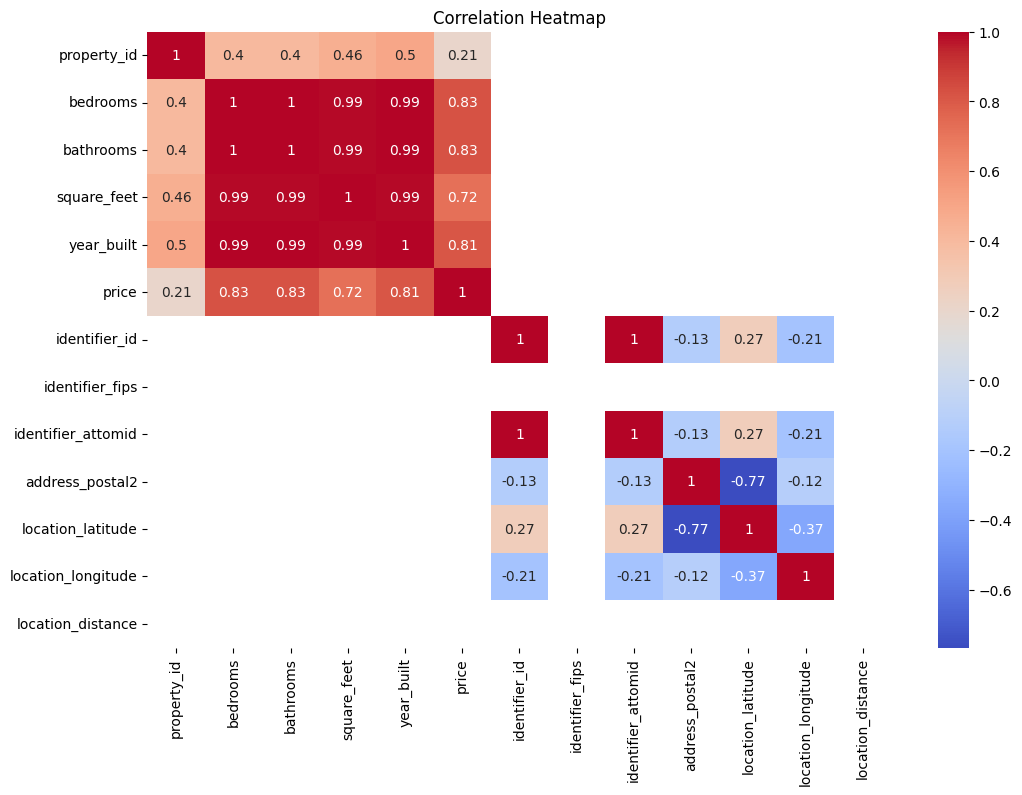

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic info
print(combined_df.info())
print(combined_df.describe())

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(combined_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
